# Experiment 3

Epoch 1/100
2730/2735 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9932
Epoch 1: val_loss improved from inf to 0.00002, saving model to ANN_best_model_Analomaly.keras
2735/2735 [==============================] - 22s 8ms/step - loss: 0.0236 - accuracy: 0.9932 - val_loss: 2.2700e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/100
2729/2735 [============================>.] - ETA: 0s - loss: 3.7560e-04 - accuracy: 1.0000
Epoch 2: val_loss improved from 0.00002 to 0.00000, saving model to ANN_best_model_Analomaly.keras
2735/2735 [==============================] - 21s 8ms/step - loss: 3.7495e-04 - accuracy: 1.0000 - val_loss: 2.8106e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/100
2732/2735 [============================>.] - ETA: 0s - loss: 1.5515e-04 - accuracy: 1.0000
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to ANN_best_model_Analomaly.keras
2735/2735 [==============================] - 21s 8ms/step - loss: 1.5504e-04 - accuracy: 1.0000 

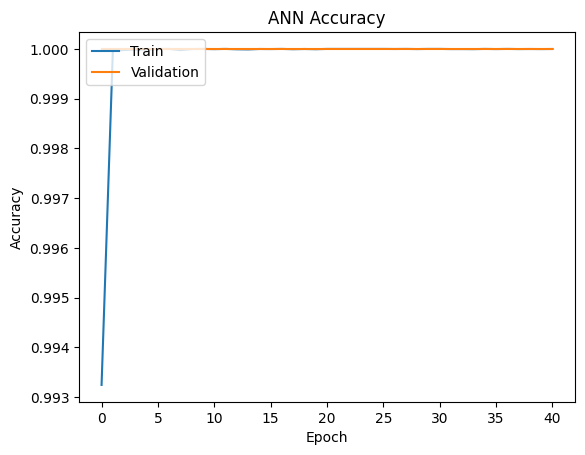

ANN Results:
Loss: 4.496831742524076e-16
Accuracy: 1.0
F1 Score: 1.0

Confusion Matrix:
[[ 14717      0]
 [     0 135283]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14717
         1.0       1.00      1.00      1.00    135283

    accuracy                           1.00    150000
   macro avg       1.00      1.00      1.00    150000
weighted avg       1.00      1.00      1.00    150000



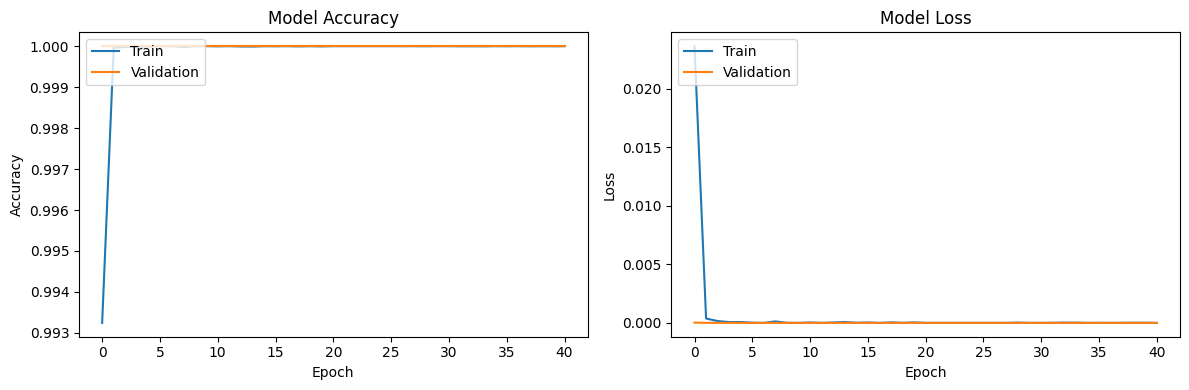

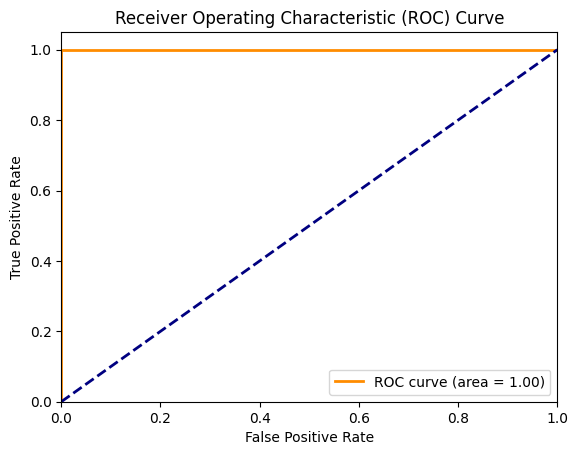

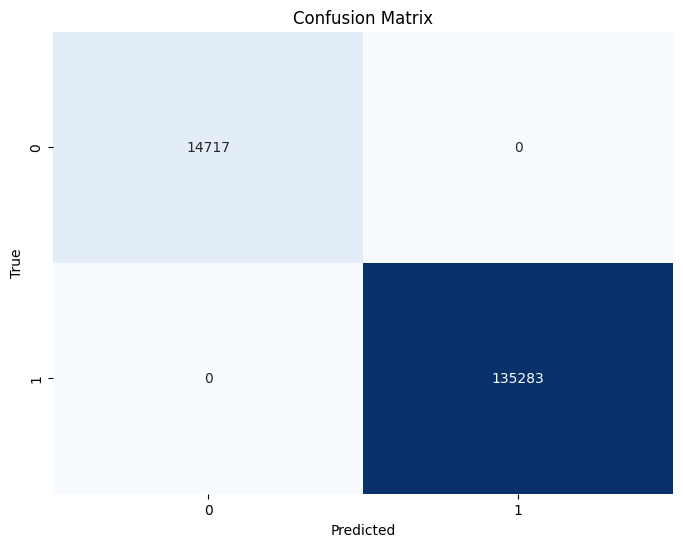

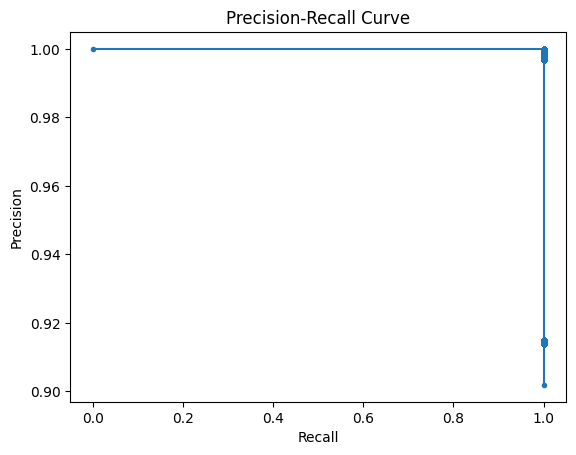

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, auc, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Load and prepare data
ECU1 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU1.csv", header=None))
ECU2 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU2.csv", header=None))
ECU3 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU3.csv", header=None))
ECU4 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU4.csv", header=None))
ECU5 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU5.csv", header=None))
ECU6 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU6.csv", header=None))
ECU7 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU7.csv", header=None))
ECU8 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU8.csv", header=None))
ECU9 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU9.csv", header=None))
ECU10 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU10.csv", header=None))

X = np.concatenate((ECU1[:, :-1], ECU2[:, :-1], ECU3[:, :-1], ECU4[:, :-1], ECU5[:, :-1], ECU6[:, :-1], ECU7[:, :-1], ECU8[:, :-1], ECU9[:, :-1], ECU10[:, :-1]))
y = np.concatenate((np.zeros(ECU1.shape[0]), np.ones(ECU2.shape[0]), np.ones(ECU3.shape[0]), np.ones(ECU4.shape[0]), np.ones(ECU5.shape[0]), np.ones(ECU6.shape[0]), np.ones(ECU7.shape[0]), np.ones(ECU8.shape[0]), np.ones(ECU9.shape[0]), np.ones(ECU10.shape[0])))

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Function to plot training history
def plot_history(history, model_name):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# ANN Model
def build_ann():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train and evaluate ANN model
def train_evaluate_ann():
    ann_model = build_ann()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    model_checkpoint = ModelCheckpoint('ANN_best_model_Analomaly.keras', monitor='val_loss', save_best_only=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)

    history = ann_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                            epochs=100, batch_size=256, callbacks=[early_stopping, model_checkpoint, reduce_lr])

    loss, accuracy = ann_model.evaluate(X_test, y_test)
    y_pred_prob = ann_model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    f1 = f1_score(y_test, y_pred, average='weighted')

    plot_history(history, 'ANN')

    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return {'model': 'ANN', 'loss': loss, 'accuracy': accuracy, 'f1_score': f1, 'conf_matrix': conf_matrix, 'class_report': class_report, 'history': history, 'y_pred_prob': y_pred_prob}

# Train and evaluate the ANN model
ann_results = train_evaluate_ann()

# Print results
print("ANN Results:")
print(f"Loss: {ann_results['loss']}")
print(f"Accuracy: {ann_results['accuracy']}")
print(f"F1 Score: {ann_results['f1_score']}")

print("\nConfusion Matrix:")
print(ann_results['conf_matrix'])

print("\nClassification Report:")
print(ann_results['class_report'])

# Function to plot all metrics
def plot_all_metrics(history, y_test, y_pred_prob):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, (y_pred_prob > 0.5).astype(int).flatten())
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

    plt.figure()
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Use the function to plot all metrics
plot_all_metrics(ann_results['history'], y_test, ann_results['y_pred_prob'])
